# Load Data

Currently, only interface to the GAMMA software is porvided.

## Load GAMMA result

The data from gamma software needed for this tutorial:

In [ ]:
!ls -R ../../../data/gamma/

../../../data/gamma/:
DEM  geocoding	rslc

../../../data/gamma/DEM:
dem_seg  dem_seg_par

../../../data/gamma/geocoding:
20210802.diff_par  20210802.lt_fine  20210802.lv_theta
20210802.hgt	   20210802.lv_phi

../../../data/gamma/rslc:
20210802.rslc	   20211011.rslc.par  20220718.rslc	 20220912.rslc.par
20210802.rslc.par  20211025.rslc      20220718.rslc.par  20220926.rslc
20210816.rslc	   20211025.rslc.par  20220801.rslc	 20220926.rslc.par
20210816.rslc.par  20220606.rslc      20220801.rslc.par  20221010.rslc
20210830.rslc	   20220606.rslc.par  20220815.rslc	 20221010.rslc.par
20210830.rslc.par  20220620.rslc      20220815.rslc.par  20221024.rslc
20210913.rslc	   20220620.rslc.par  20220829.rslc	 20221024.rslc.par
20210913.rslc.par  20220704.rslc      20220829.rslc.par
20211011.rslc	   20220704.rslc.par  20220912.rslc


Import Moraine:

In [ ]:
import moraine.cli as mc

In [ ]:
logger = mc.get_logger()

In [ ]:
rslc_dir = '../../../data/gamma/rslc'
reference = '20220620'
rslc_par = '../../../data/gamma/rslc/20220620.rslc.par'
hgt = '../../../data/gamma/geocoding/20210802.hgt'
lt = '../../../data/gamma/geocoding/20210802.lt_fine'
diff_par = '../../../data/gamma/geocoding/20210802.diff_par'
dem_par = '../../../data/gamma/DEM/dem_seg_par'
theta = '../../../data/gamma/geocoding/20210802.lv_theta'
phi = '../../../data/gamma/geocoding/20210802.lv_phi'

scratch_dir = './load_data/scratch'
rslc_zarr = './load_data/rslc.zarr'
lat_zarr = './load_data/lat.zarr'
lon_zarr = './load_data/lon.zarr'
theta_zarr = './load_data/theta.zarr'
phi_zarr = './load_data/phi.zarr'
hgt_zarr = './load_data/hgt.zarr'
range_zarr = './load_data/range.zarr'
meta_file = './load_data/meta.toml'

In [ ]:
mc.load_gamma_flatten_rslc(rslc_dir,reference,hgt,scratch_dir,rslc_zarr,chunks=(1000,-1),threads_per_worker=4)
mc.load_gamma_lat_lon_hgt(diff_par,rslc_par,dem_par,hgt,scratch_dir,lat_zarr,lon_zarr,hgt_zarr,chunks=(1000,-1))
mc.load_gamma_look_vector(theta,phi,lt,rslc_par,dem_par,scratch_dir,theta_zarr,phi_zarr,chunks=(1000,-1))
mc.load_gamma_range(rslc_par,range_zarr,chunks=(1000,-1))
mc.load_gamma_metadata(rslc_dir,dem_par,reference,meta_file)

2024-07-17 21:57:29 - log_args - INFO - running function: load_gamma_flatten_rslc
2024-07-17 21:57:29 - log_args - INFO - fetching args:
2024-07-17 21:57:29 - log_args - INFO - rslc_dir = '../../../data/gamma/rslc'
2024-07-17 21:57:29 - log_args - INFO - reference = '20220620'
2024-07-17 21:57:29 - log_args - INFO - hgt = '../../../data/gamma/geocoding/20210802.hgt'
2024-07-17 21:57:29 - log_args - INFO - scratch_dir = './load_data/scratch'
2024-07-17 21:57:29 - log_args - INFO - rslc_zarr = './load_data/rslc.zarr'
2024-07-17 21:57:29 - log_args - INFO - chunks = (1000, -1)
2024-07-17 21:57:29 - log_args - INFO - processes = False
2024-07-17 21:57:29 - log_args - INFO - n_workers = 1
2024-07-17 21:57:29 - log_args - INFO - threads_per_worker = 4
2024-07-17 21:57:29 - log_args - INFO - dask_cluster_arg = {}
2024-07-17 21:57:29 - log_args - INFO - fetching args done.
2024-07-17 21:57:29 - load_gamma_flatten_rslc - INFO - rslc found: 
        date                                    rslc  

Here we get all needed data: look vector, latitude, lontitude, height, metadata, slant range distance, and flattened rslc stack.

## visualize the loaded interferograms

Then we can visualize the loaded data, e.g., the interferograms:

In [ ]:
mc.ras_pyramid(rslc_zarr, './load_data/rslc_pyramid',threads_per_worker=17)

2024-07-17 21:57:32 - log_args - INFO - running function: ras_pyramid
2024-07-17 21:57:32 - log_args - INFO - fetching args:
2024-07-17 21:57:32 - log_args - INFO - ras = './load_data/rslc.zarr'
2024-07-17 21:57:32 - log_args - INFO - out_dir = './load_data/rslc_pyramid'
2024-07-17 21:57:32 - log_args - INFO - chunks = (256, 256)
2024-07-17 21:57:32 - log_args - INFO - processes = False
2024-07-17 21:57:32 - log_args - INFO - n_workers = 1
2024-07-17 21:57:32 - log_args - INFO - threads_per_worker = 17
2024-07-17 21:57:32 - log_args - INFO - dask_cluster_arg = {}
2024-07-17 21:57:32 - log_args - INFO - fetching args done.
2024-07-17 21:57:32 - zarr_info - INFO - ./load_data/rslc.zarr zarray shape, chunks, dtype: (2500, 1834, 17), (1000, 1834, 1), complex64
2024-07-17 21:57:32 - ras_pyramid - INFO - rendered raster pyramid with zoom level ranging from 0 (finest resolution) to 10 (coarsest resolution).
2024-07-17 21:57:32 - ras_pyramid - INFO - dask local cluster started.
2024-07-17 21:5

In [ ]:
import toml
with open(meta_file,'r') as f:
    meta = toml.load(f)
dates = meta['dates']

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
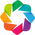

In [ ]:
import holoviews as hv
hv.extension('bokeh')
hv.output(widget_location='bottom')
from bokeh.models import WheelZoomTool
from holoviews import opts
import numpy as np

Interferograms with the first slc as secondary:

In [ ]:
intf0_plot = mc.ras_plot('./load_data/rslc_pyramid', post_proc='intf_0', level_increase=0)

In [ ]:
intf0_plot = intf0_plot.redim(i=hv.Dimension('i', label='Interferogram', range=(0,len(dates)-1), value_format=(lambda i: dates[i]+'_'+dates[0])),
                              x=hv.Dimension('r', label='Range'), y=hv.Dimension('az',label='Azimuth'), z=hv.Dimension('Phase',range=(-np.pi,np.pi)))

In [ ]:
intf0_plot.opts(opts.Image(cmap='colorwheel',width=600, height=600, colorbar=True,
                          invert_yaxis=True,
                          default_tools=['pan',WheelZoomTool(zoom_on_axis=False),'save','reset','hover'],active_tools=['wheel_zoom']))

:DynamicMap   [i]
   :Image   [r,az]   (Phase)

Or all of the interferograms:

In [ ]:
intf_plot = mc.ras_plot('./load_data/rslc_pyramid',post_proc='intf_all',n_kdim=2,level_increase=0)

In [ ]:
intf_plot = intf_plot.redim(i=hv.Dimension('i', label='Reference Image', range=(0,16), value_format=(lambda i: dates[i])),
                            j=hv.Dimension('j', label='Secondary Image', range=(0,16), value_format=(lambda i: dates[i])),
                            x=hv.Dimension('r', label='Range'), y=hv.Dimension('az',label='Azimuth'), z=hv.Dimension('Phase',range=(-np.pi,np.pi)))

Specify plotting options and plot:

In [ ]:
hv.output(widget_location='bottom')
intf_plot.opts(opts.Image(cmap='colorwheel',frame_width=500, frame_height=600, colorbar=True,
                          invert_yaxis=True,
                          default_tools=['pan',WheelZoomTool(zoom_on_axis=False),'save','reset','hover'],active_tools=['wheel_zoom']))

:DynamicMap   [i,j]
   :Image   [r,az]   (Phase)

## calculate Web Mercator coordinates

For visulization on Google Map tiles, coordinates on Web Mercator projection is needed:

In [ ]:
e_zarr = './load_data/e.zarr'
n_zarr = './load_data/n.zarr'

In [ ]:
mc.transform(lon_zarr,lat_zarr,e_zarr,n_zarr)

2024-07-17 21:57:42 - log_args - INFO - running function: transform
2024-07-17 21:57:42 - log_args - INFO - fetching args:
2024-07-17 21:57:42 - log_args - INFO - xx_in = './load_data/lon.zarr'
2024-07-17 21:57:42 - log_args - INFO - yy_in = './load_data/lat.zarr'
2024-07-17 21:57:42 - log_args - INFO - xx_out = './load_data/e.zarr'
2024-07-17 21:57:42 - log_args - INFO - yy_out = './load_data/n.zarr'
2024-07-17 21:57:42 - log_args - INFO - epsg_in = 4326
2024-07-17 21:57:42 - log_args - INFO - epsg_out = 3857
2024-07-17 21:57:42 - log_args - INFO - fetching args done.
2024-07-17 21:57:42 - transform - INFO - input EPSG: 4326.
2024-07-17 21:57:42 - zarr_info - INFO - xx_in zarray shape, chunks, dtype: (2500, 1834), (1000, 1834), float64
2024-07-17 21:57:42 - zarr_info - INFO - yy_in zarray shape, chunks, dtype: (2500, 1834), (1000, 1834), float64
2024-07-17 21:57:42 - transform - INFO - output EPSG: 3857.
2024-07-17 21:57:42 - transform - INFO - do the transformation.


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

2024-07-17 21:57:45 - transform - INFO - write output.
2024-07-17 21:57:46 - transform - INFO - write done.
